In [1]:
import numpy as np
import pandas as pd
import xgboost as xgb

import sys
sys.path.append('../src')
from plot_utils import plot_confusion_matrix, plot_hypnogram, plot_class_agreement
import data_utils

In [2]:
# File paths for labels
label_paths1 = [f"../dataset/{i}/{i}_1.txt" for i in range(1, 11)]
label_paths2 = [f"../dataset/{i}/{i}_2.txt" for i in range(1, 11)]

# Load and preprocess labels
labels1 = data_utils.load_and_preprocess_labels(label_paths1)
labels2 = data_utils.load_and_preprocess_labels(label_paths2)

# Compute agreement metrics
metrics = data_utils.compute_label_agreement(labels1, labels2)
print(f"Total Labels: {metrics['total_labels']}")
print(f"Number of Matches: {metrics['num_matches']}")
print(f"Number of Differences: {metrics['num_differences']}")
print(f"Agreement Percentage: {metrics['agreement_percentage']:.2f}%")

Total Labels: 8589
Number of Matches: 7580
Number of Differences: 1009
Agreement Percentage: 88.25%


In [3]:
metrics

{'total_labels': 8589,
 'num_matches': 7580,
 'num_differences': 1009,
 'agreement_percentage': 88.25241588077773,
 'class_metrics': {0: {'total': 1705,
   'matches': 1529,
   'agreement_percentage': 89.6774193548387},
  1: {'total': 1453,
   'matches': 862,
   'agreement_percentage': 59.325533379215415},
  2: {'total': 3051,
   'matches': 2345,
   'agreement_percentage': 76.86004588659456},
  3: {'total': 2152,
   'matches': 1821,
   'agreement_percentage': 84.61895910780669},
  4: {'total': 1237,
   'matches': 1023,
   'agreement_percentage': 82.70008084074374}}}

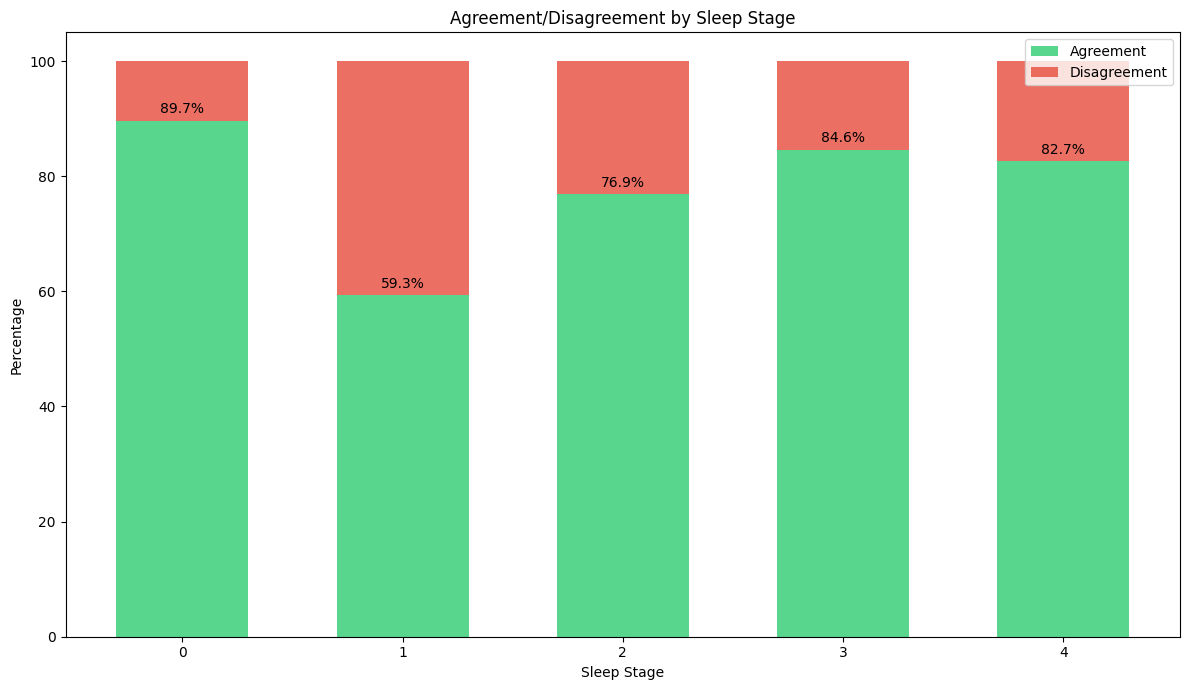

In [4]:
plot_class_agreement(metrics)

In [6]:
# File paths for EDF data
edf_paths = [f"../dataset/{i}/{i}.edf" for i in range(1, 11)]

# Channels to drop
channels_to_drop = ['X4', 'X5', 'X6', 'DC3', 'X7', 'X8', 'SaO2', 'DC8', 'ROC-A1', 
                    'F3-A2', 'C3-A2', 'O1-A2', 'F4-A1', 'O2-A1', 'X2', 'X3']

# Load and preprocess EDF data
edf_features = data_utils.load_and_preprocess_edf(
    edf_paths, channels_to_drop, eeg_name='C4-A1', eog_name='LOC-A2', emg_name='X1'
)

Extracting EDF parameters from c:\Machine Learning\Master Tuebingen\Semester_3\HDA\sleep-stage-detection\dataset\1\1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 5723999  =      0.000 ... 28619.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.3 - 49 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.30
- Lower transition bandwidth: 0.30 Hz (-6 dB cutoff frequency: 0.15 Hz)
- Upper passband edge: 49.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 49.50 Hz)
- Filter length: 1101 samples (11.010 s)

Extracting EDF parameters from c:\Machine Learning\Master Tuebingen\Semester_3\HDA\sleep-stage-detection\dataset\2\2.edf...
EDF file detected
Setting channel info structur

In [7]:
df = pd.concat(edf_features, axis=0, ignore_index=True)
df['label'] = labels1
df['label2'] = labels2
df

,eeg_abspow,eeg_abspow_c7min_norm,eeg_abspow_p2min_norm,eeg_alpha,eeg_alpha_c7min_norm,eeg_alpha_p2min_norm,eeg_at,eeg_at_c7min_norm,eeg_at_p2min_norm,eeg_beta,...,eog_std_c7min_norm,eog_std_p2min_norm,eog_theta,eog_theta_c7min_norm,eog_theta_p2min_norm,time_hour,time_norm,patient,label,label2
0,2.223068,0.204966,0.002076,0.306459,0.378508,0.849507,4.183846,0.938656,2.029363,0.126726,...,1.719663,2.068285,0.027003,-0.753603,-0.772851,0.000000,0.000000,1,0,0
1,1.739309,0.187676,-0.035666,0.214499,0.363193,0.644535,1.858936,0.838479,1.347365,0.142990,...,1.567306,1.747598,0.048089,-0.751319,-0.699733,0.008333,0.001049,1,0,0
2,10.646273,0.178649,0.415034,0.053756,0.354735,0.337353,1.102060,0.774777,0.972015,0.103112,...,1.419040,1.826927,0.042671,-0.753057,-0.687887,0.016667,0.002099,1,0,0
3,3.218050,0.118178,0.350609,0.125759,0.373581,0.264007,1.339224,0.733314,0.819126,0.195343,...,1.242866,1.746112,0.048401,-0.756539,-0.672028,0.025000,0.003148,1,0,0
4,1.839396,0.060042,0.335642,0.145482,0.400621,0.084603,1.453737,0.701424,0.418695,0.268479,...,1.056105,1.544686,0.039588,-0.762816,-0.650208,0.033333,0.004197,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8584,1.689531,0.083630,0.166005,0.054617,0.042170,-0.040508,0.309166,-0.037917,-0.024846,0.012473,...,-0.044361,-0.024150,0.124126,0.052475,0.035126,6.341667,0.957233,10,3,3
8585,0.827841,0.060448,0.132634,0.112396,0.080795,0.005466,0.447176,-0.022316,-0.102220,0.037533,...,-0.043509,-0.029735,0.265009,0.063362,0.196317,6.350000,0.958491,10,3,3
8586,0.969841,0.041204,0.110130,0.066259,0.106981,-0.059442,0.373438,-0.005168,-0.185313,0.023099,...,-0.038315,-0.041812,0.135848,0.042102,0.174866,6.358333,0.959748,10,3,3
8587,1.027211,0.025514,0.078914,0.126245,0.131536,0.155500,0.877514,0.014709,0.090224,0.084172,...,0.011695,0.080303,0.053560,0.012319,0.027808,6.366667,0.961006,10,0,0


<Axes: xlabel='label'>

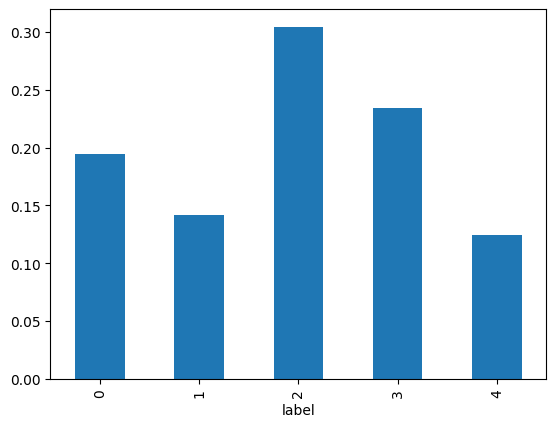

In [9]:
df['label'].value_counts(normalize=True).sort_index().plot(kind='bar')

<Axes: xlabel='label2'>

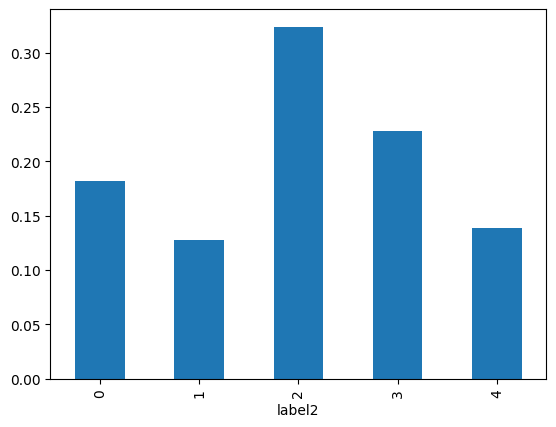

In [10]:
df['label2'].value_counts(normalize=True).sort_index().plot(kind='bar')

In [6]:
df_train = df.loc[df['patient'].between(1, 8)].copy()
df_test = df.loc[df['patient'].between(9, 10)].copy()

y_train = df_train['label'].copy()
X_train = df_train.drop(columns=['label']).copy()

y_test = df_test['label'].copy()
X_test = df_test.drop(columns=['label']).copy()

In [7]:
print("Label distribution in y_train:")
print(y_train.value_counts(normalize=True).sort_index())
print("\nLabel distribution in y_test:")
print(y_test.value_counts(normalize=True).sort_index())

Label distribution in y_train:
label
0    0.207002
1    0.120715
2    0.302295
3    0.243899
4    0.126089
Name: proportion, dtype: float64

Label distribution in y_test:
label
0    0.146041
1    0.226393
2    0.313783
3    0.197654
4    0.116129
Name: proportion, dtype: float64
